# Mongolia Grassland Mapping 

In [2]:
import sys
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import rasterio as rio
from rasterio.mask import mask
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from glob import glob


import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import matplotlib.pyplot as plt
# %matplotlib inline

import utils
import util_preprocess

## Set directory

In [6]:
# Get abosolute path of the current folder
FPATH = 'D:/mongolia/GITHUB/features'

# Get abosolute output path of te current folder
OUTPUT = 'D:/mongolia/mongolia_ml_model/output/'

target = 'class'

# Random seed
# The random seed
random_seed = 42

# Set random seed in numpy
np.random.seed(random_seed)

In [7]:
# Load data to VRT for processing 
files = sorted(glob(f'{FPATH}/*/*.tif'))

# Load data data for processing 
# files = sorted(glob(f'{FPATH}/fourier/*.tif'))
array_stack, meta_data = es.stack(files, nodata=0.0)

# Process spfea features, get the width, height and number of bands
n = array_stack.shape[0]
print (n) # number of bands
h = array_stack.shape[1]
print (h) # height
w = array_stack.shape[2]
print (w) # width

31
2379
2490


## Plot images

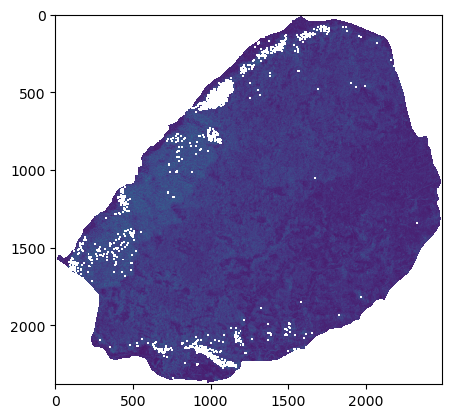

In [8]:
#plot 
plt.imshow(array_stack[9])

## EXploratory Analysis

### Fourier

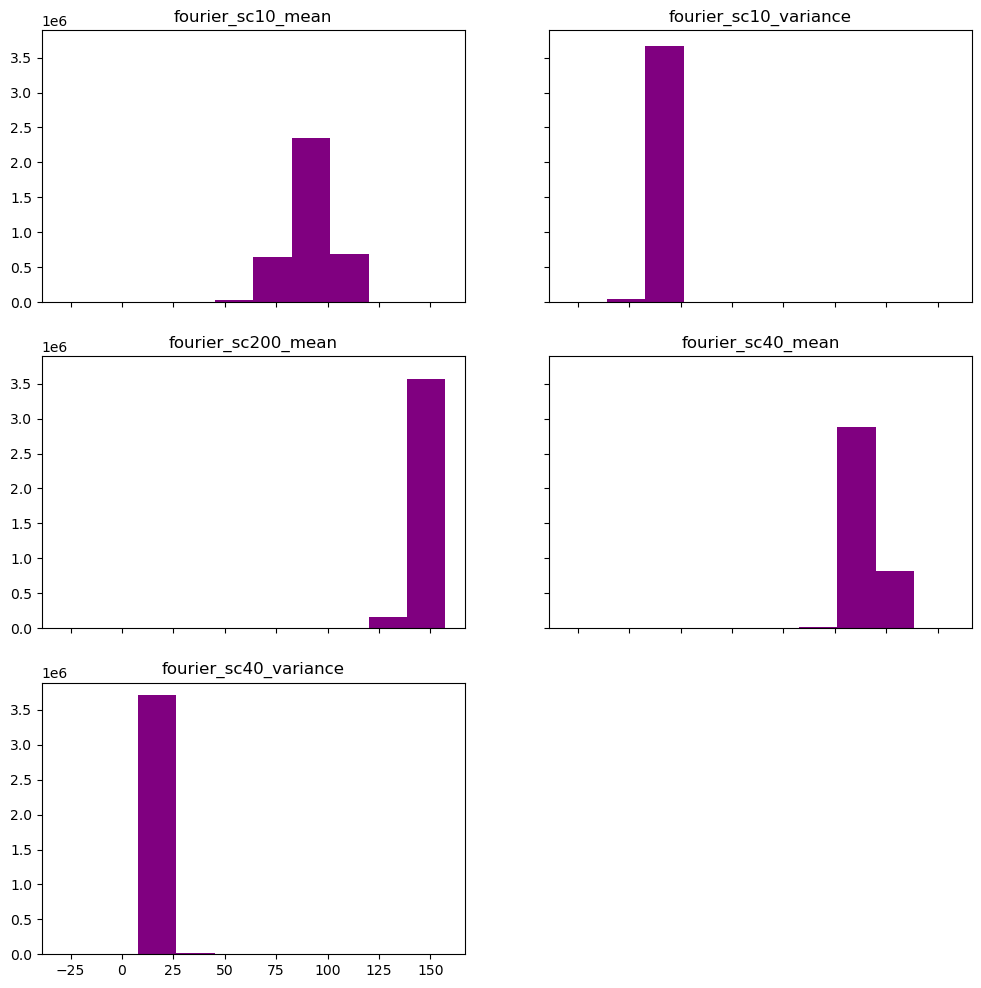

In [17]:
files = sorted(glob(f'{FPATH}/fourier_sub/*.tif'))
array_stack, meta_data = es.stack(files, nodata=0.0)

# Create the list of titles for each band. The titles and colors listed
# in this example reflect the order and wavelengths of the Landsat 8 bands
bandname = []
for file in files:
    head, tail = os.path.split(file)
    col_names=tail[:-4]
    bandname.append(col_names)
titles = bandname

# Plot the histograms with the color and title lists you just created
# sphinx_gallery_thumbnail_number = 1
ep.hist(array_stack, title=titles, bins=10, cols=2)
plt.show()

### Gabor


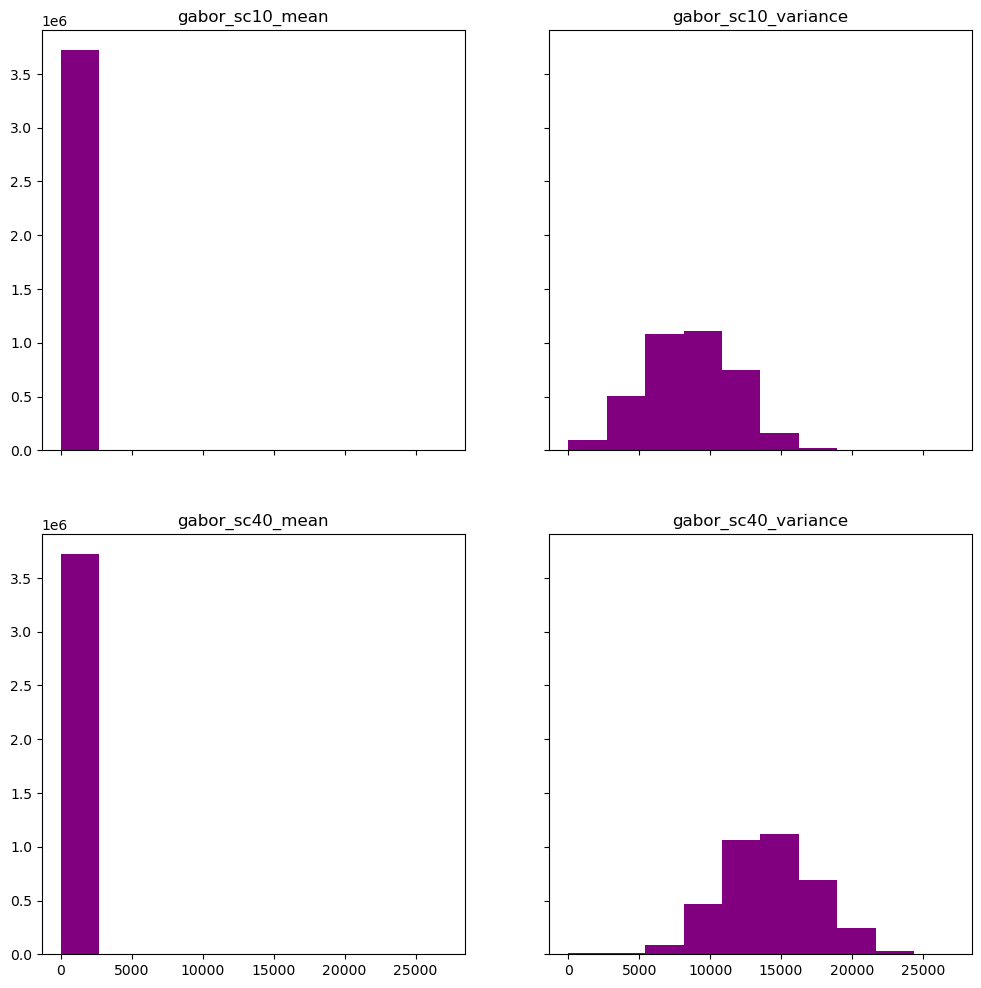

In [18]:
files = sorted(glob(f'{FPATH}/gabor_sub/*.tif'))
array_stack, meta_data = es.stack(files, nodata=0.0)

# Create the list of titles for each band. The titles and colors listed
# in this example reflect the order and wavelengths of the Landsat 8 bands
bandname = []
for file in files:
    head, tail = os.path.split(file)
    col_names=tail[:-4]
    bandname.append(col_names)
titles = bandname

# Plot the histograms with the color and title lists you just created
# sphinx_gallery_thumbnail_number = 1
ep.hist(array_stack, title=titles, bins=10, cols=2)
plt.show()

### Hog

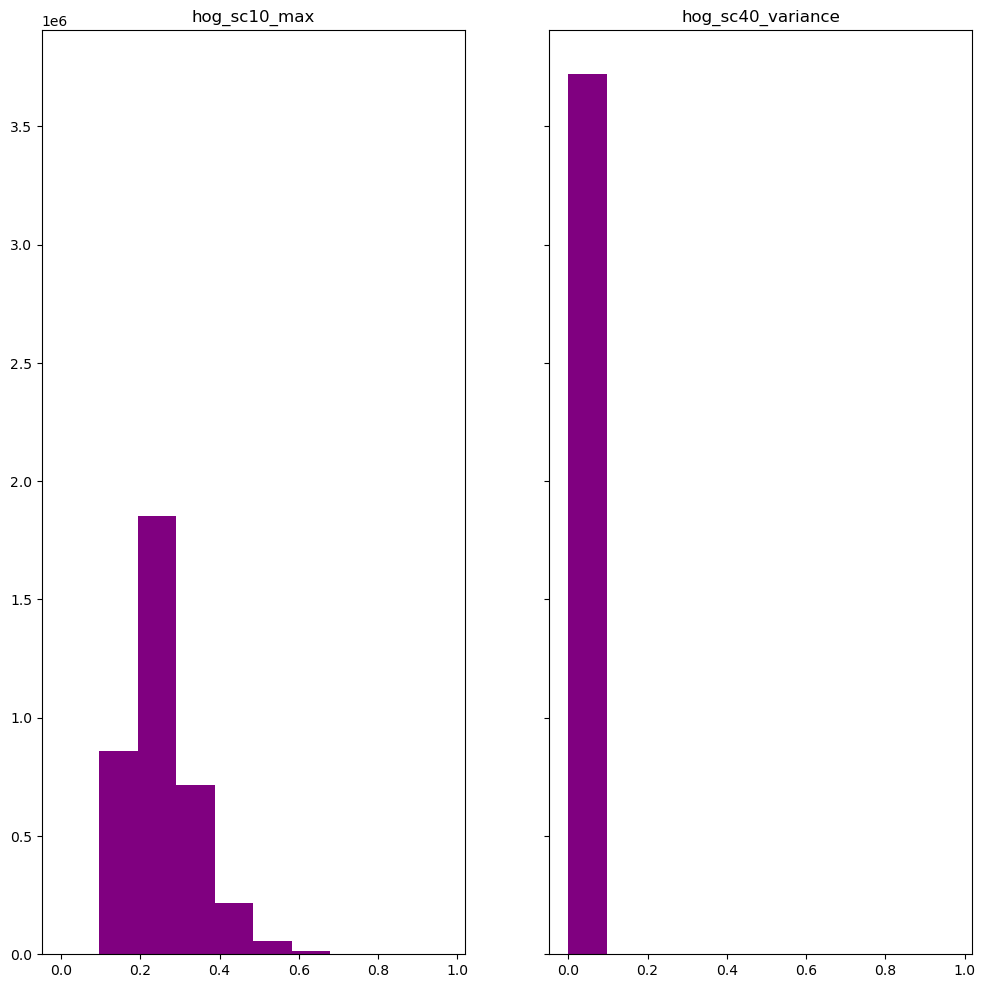

In [20]:
files = sorted(glob(f'{FPATH}/hog_sub/*.tif'))
array_stack, meta_data = es.stack(files, nodata=0.0)

# Create the list of titles for each band. The titles and colors listed
# in this example reflect the order and wavelengths of the Landsat 8 bands
bandname = []
for file in files:
    head, tail = os.path.split(file)
    col_names=tail[:-4]
    bandname.append(col_names)
titles = bandname

# Plot the histograms with the color and title lists you just created
# sphinx_gallery_thumbnail_number = 1
ep.hist(array_stack, title=titles, bins=10)
plt.show()

### Mean

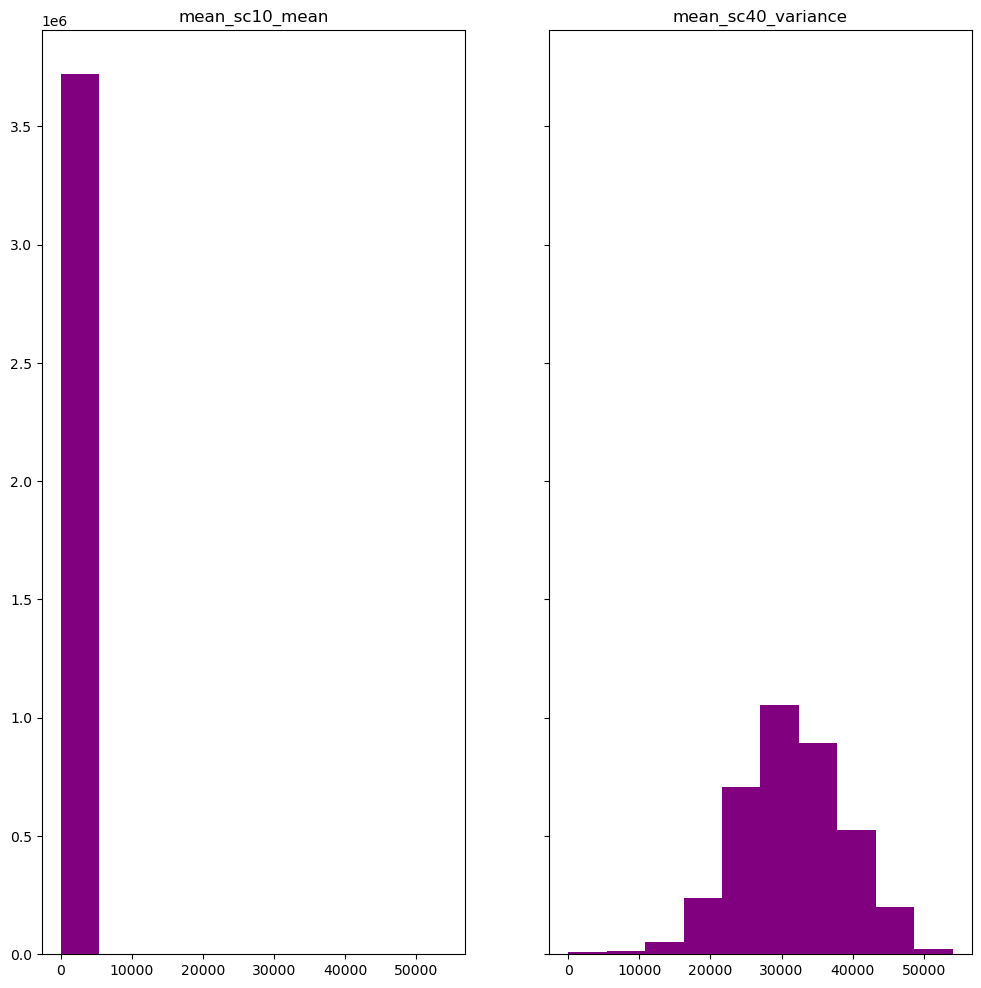

In [21]:
files = sorted(glob(f'{FPATH}/mean_sub/*.tif'))
array_stack, meta_data = es.stack(files, nodata=0.0)

# Create the list of titles for each band. The titles and colors listed
# in this example reflect the order and wavelengths of the Landsat 8 bands
bandname = []
for file in files:
    head, tail = os.path.split(file)
    col_names=tail[:-4]
    bandname.append(col_names)
titles = bandname

# Plot the histograms with the color and title lists you just created
# sphinx_gallery_thumbnail_number = 1
ep.hist(array_stack, title=titles, bins=10, cols=2)
plt.show()

### LSR

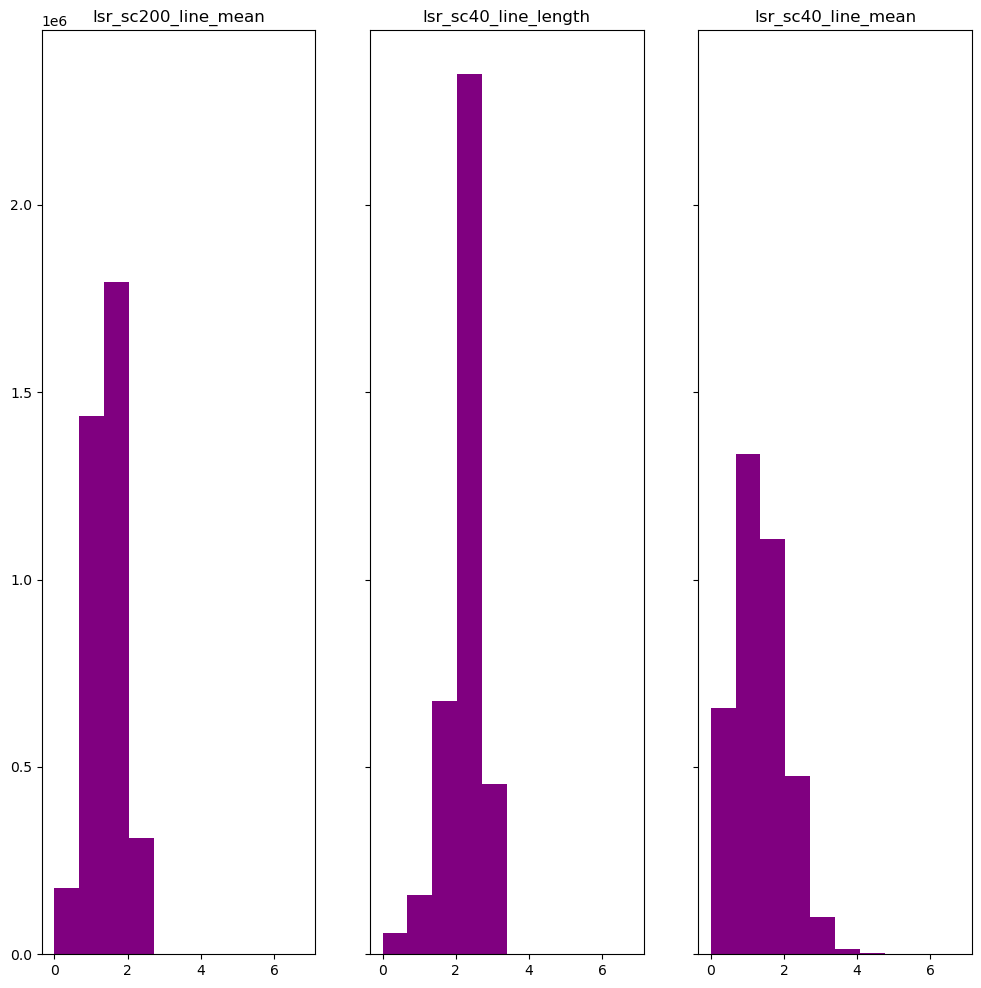

In [23]:
files = sorted(glob(f'{FPATH}/lsr_sub/*.tif'))
array_stack, meta_data = es.stack(files, nodata=0.0)

# Create the list of titles for each band. The titles and colors listed
# in this example reflect the order and wavelengths of the Landsat 8 bands
bandname = []
for file in files:
    head, tail = os.path.split(file)
    col_names=tail[:-4]
    bandname.append(col_names)
titles = bandname

# Plot the histograms with the color and title lists you just created
# sphinx_gallery_thumbnail_number = 1
ep.hist(array_stack, title=titles, bins=10, cols=3)
plt.show()

### IBPM

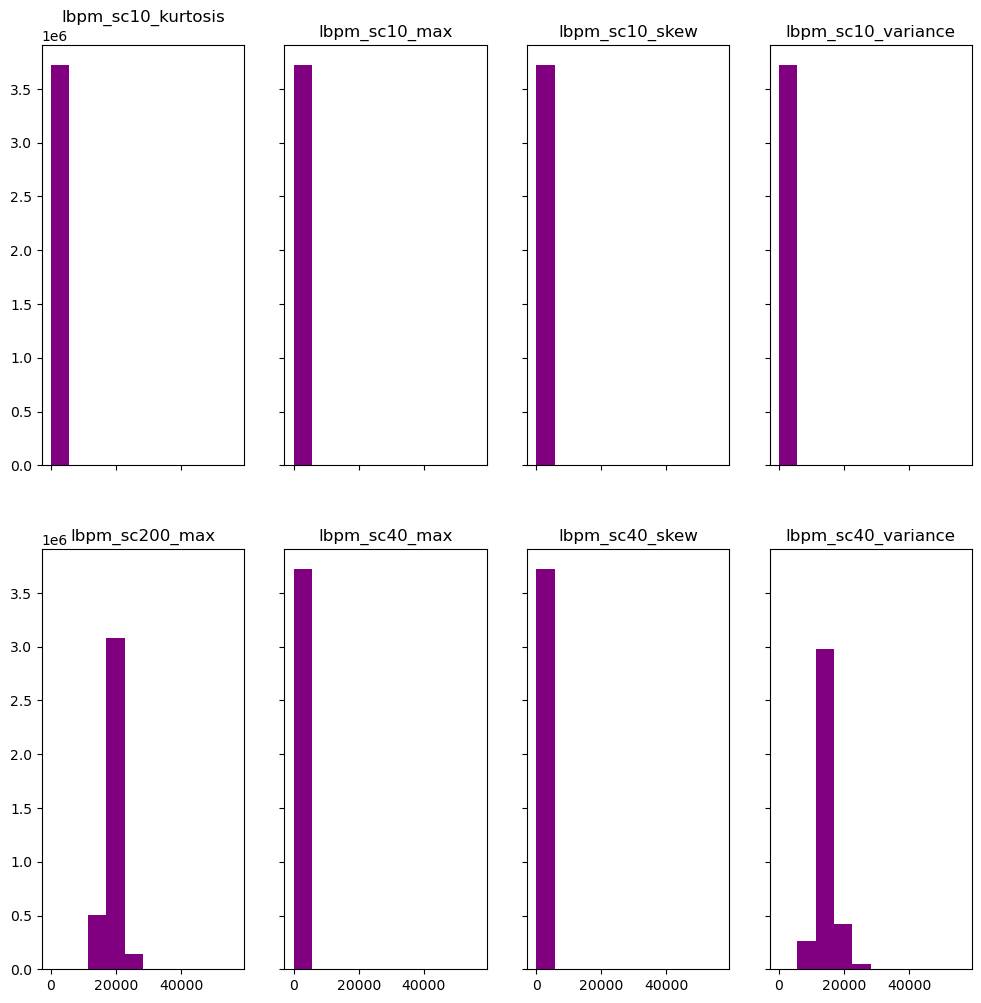

In [27]:
files = sorted(glob(f'{FPATH}/lbpm_sub/*.tif'))
array_stack, meta_data = es.stack(files, nodata=0.0)

# Create the list of titles for each band. The titles and colors listed
# in this example reflect the order and wavelengths of the Landsat 8 bands
bandname = []
for file in files:
    head, tail = os.path.split(file)
    col_names=tail[:-4]
    bandname.append(col_names)
titles = bandname

# Plot the histograms with the color and title lists you just created
# sphinx_gallery_thumbnail_number = 1
ep.hist(array_stack, title=titles, bins=10, cols=4)
plt.show()

### ORB

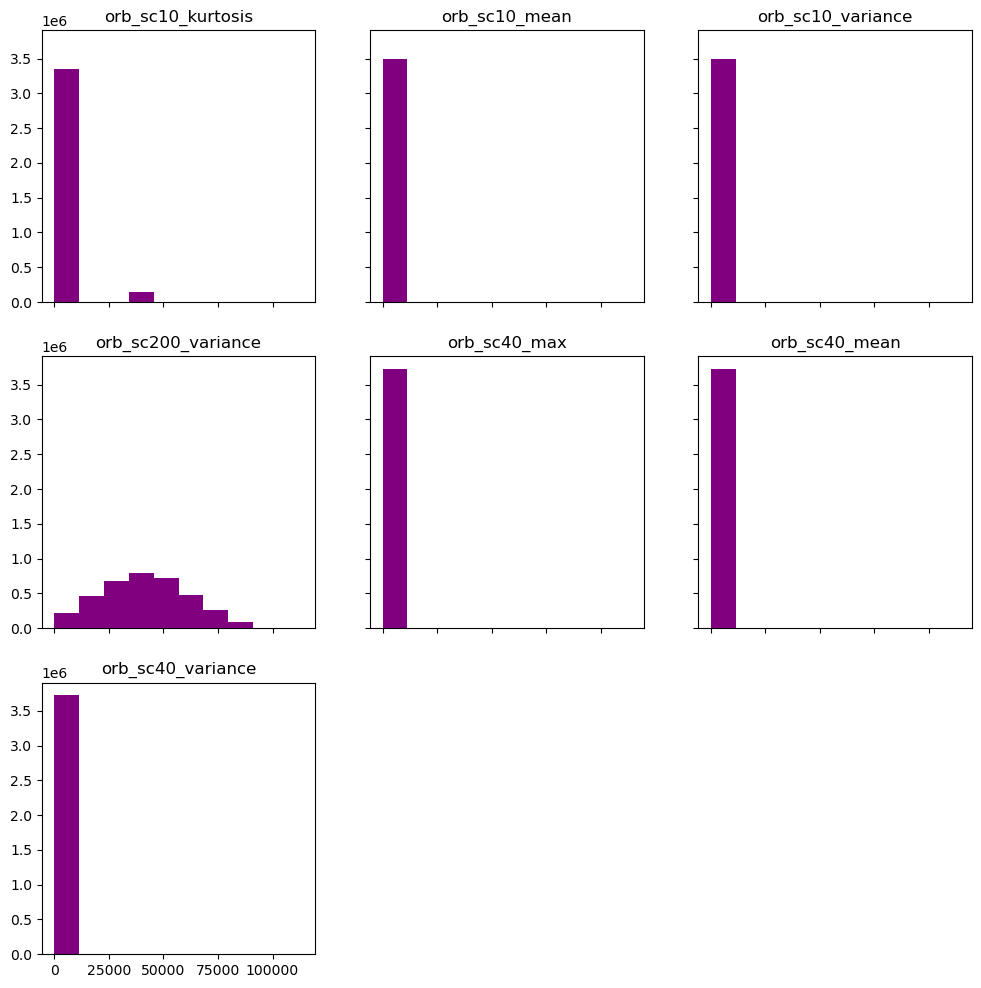

In [29]:
files = sorted(glob(f'{FPATH}/orb_sub/*.tif'))
array_stack, meta_data = es.stack(files, nodata=0.0)

# Create the list of titles for each band. The titles and colors listed
# in this example reflect the order and wavelengths of the Landsat 8 bands
bandname = []
for file in files:
    head, tail = os.path.split(file)
    col_names=tail[:-4]
    bandname.append(col_names)
titles = bandname

# Plot the histograms with the color and title lists you just created
# sphinx_gallery_thumbnail_number = 1
ep.hist(array_stack, title=titles, bins=10, cols=3)
plt.show()

## Process training data

In [9]:
PATH_TR=glob(f'D:/mongolia/mongolia_ml_model/train_mgl_2/*.tif')

train_array, meta_data = es.stack(PATH_TR, nodata=-2147483648)
train_array = train_array.astype(int)

print(train_array.shape)

(unique, counts) = np.unique(train_array, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

(2, 2379, 2490)


array([[-2147483648,    11843450],
       [          1,         626],
       [          2,         294],
       [          3,         110],
       [          4,         284],
       [          5,         446],
       [          6,        1098],
       [          7,         986],
       [          8,         126]], dtype=int64)

## Concatenate training and features  dataset

In [10]:
# concat 
y=np.array(train_array[0,...]).reshape(1,h,w)
x=array_stack
data = np.concatenate((y,x),axis=0)
data.shape

(32, 2379, 2490)

## Spliting data train, validationa and test 

In [11]:
# We now split our data into training and test set
data = data.reshape(data.shape[0], -1)
#Train data
data_train = data[:, ~np.isnan(data).any(axis=0)]
#data_train = data_train[:, (data_train!=-999).any(axis=0)]
data_train = data[:, data[0,...]!=-2147483648]
y = data_train[0,...]
x = data_train[1:,...]

#Let's check the shape
print(data_train.shape)


print (x.shape)
print (y.shape)

(32, 1985)
(31, 1985)
(1985,)


### Check class distribution

In [12]:
# Check class distribution 
(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[  1., 313.],
       [  2., 147.],
       [  3.,  55.],
       [  4., 142.],
       [  5., 223.],
       [  6., 549.],
       [  7., 493.],
       [  8.,  63.]])

### Split data into train, val and test

In [13]:
# Split into train / test data.
from sklearn.model_selection import train_test_split
test_size = 0.2
x = np.transpose(x)
y = np.transpose(y)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state = random_seed) # stratify = y)

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=test_size,  random_state = random_seed) #, stratify = y)

X_train = x_train
X_val = x_val
X_test = x_test

## Standardization 

Due to the varying ranges in data,

lets standadized the data per feature group

In [30]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()
# Standardize the training data
X_train = ss.fit_transform(x_train)

# Standardize the validation data
X_val = ss.transform(x_val)

# Standardize the test data
X_test = ss.transform(x_test)

## Hyperparameter tuning 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'hgbc': HistGradientBoostingClassifier(random_state=random_seed)}

c:\Users\mowus\.conda\envs\mongolia\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [41]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [42]:
X_train_val, y_train_val, ps = util_preprocess.get_train_val_ps(X_train, y_train, X_val, y_val)

param_grids = {}

#### Parameter grid for Logistic regression 

In [43]:
# The parameter grid of tol
tol_grid = [10 ** -7, 10 ** -5, 10 ** -4, 10 ** -3]

# The parameter grid of C
C_grid = [0.1, 1, 11, 13]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

#### Parameter grid for MLPClassifier

In [44]:
# The grids for alpha
alpha_grids = [10 ** i for i in range(-5, -3)]

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-3, 2)]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

#### Parameter grid for random forest 

In [45]:
# The grids for min_samples_split
min_samples_split_grids = [21, 23, 30, 27, 30]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 3, 7, 9, 11]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

#### Parameter grid for histogram-based gradient boosting 

In [46]:
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 27]

# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

In [47]:
# Creating the directory for the cv results produced by GridSearchCV
# Make directory
directory = os.path.dirname('D:/mongolia/mongolia_ml_model/output/mgl_map')
if not os.path.exists(directory):
    os.makedirs(directory)

In [48]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=-2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf='D:/mongolia/mongolia_ml_model/output/GridSearch' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

c:\Users\mowus\.conda\envs\mongolia\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,best_score,best_param,best_estimator
0,0.994555,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeClassifier(max_features='sqrt', ..."
1,0.989598,"{'model__learning_rate': 0.1, 'model__min_samp...",(HistGradientBoostingClassifier(random_state=42))
2,0.970955,"{'model__alpha': 1e-05, 'model__learning_rate_...","(MLPClassifier(alpha=1e-05, early_stopping=Tru..."
3,0.955377,"{'model__C': 11, 'model__tol': 1e-07}","(LogisticRegression(C=11, class_weight='balanc..."


## Model selection 

In [49]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
best_params_gs

{'model__min_samples_leaf': 1, 'model__min_samples_split': 21}

## save model File

In [50]:
# Make directory
directory = os.path.dirname('D:/mongolia/mongolia_ml_model/output/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [51]:
# Get the prediction on the test data using the best model
y_test_pred = best_estimator_gs.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix


print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_test_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred))

=== Confusion Matrix ===
[[ 66   0   0   0   0   0   0   0]
 [  0  30   0   0   0   0   0   0]
 [  0   3   9   0   0   0   0   0]
 [  0   0   0  27   0   0   0   0]
 [  0   0   0   0  42   0   0   0]
 [  0   0   0   0   3 104   0   0]
 [  0   0   0   0   0   0 101   0]
 [  0   0   0   0   0   0   0  12]]


=== Classification Report ===
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        66
         2.0       0.91      1.00      0.95        30
         3.0       1.00      0.75      0.86        12
         4.0       1.00      1.00      1.00        27
         5.0       0.93      1.00      0.97        42
         6.0       1.00      0.97      0.99       107
         7.0       1.00      1.00      1.00       101
         8.0       1.00      1.00      1.00        12

    accuracy                           0.98       397
   macro avg       0.98      0.97      0.97       397
weighted avg       0.99      0.98      0.98       397



## Inference

In [68]:
a = np.zeros((2379, 2490))
a
# 31
# 2379
# 2490

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
folders = ['fourier_sub', 'gabor_sub', 'hog_sub', 'mean_sub', 'lsr_sub', 'lbpm_sub', 'orb_sub']

files = sorted(glob(f'{FPATH}/{folders[0]}/*.tif'))
fourier_array_stack, meta_data = es.stack(files, nodata=0.0)
fourier_array_stack = fourier_array_stack.reshape(fourier_array_stack.shape[0], -1)
fourier_array_stack = ss.fit_transform(fourier_array_stack)
print(fourier_array_stack.shape)

files = sorted(glob(f'{FPATH}/{folders[1]}/*.tif'))
gabor_array_stack, meta_data = es.stack(files, nodata=0.0)
gabor_array_stack = gabor_array_stack.reshape(gabor_array_stack.shape[0], -1)
gabor_array_stack = ss.fit_transform(gabor_array_stack)
print(gabor_array_stack.shape)

files = sorted(glob(f'{FPATH}/{folders[2]}/*.tif'))
hog_array_stack, meta_data = es.stack(files, nodata=0.0)
hog_array_stack = hog_array_stack.reshape(hog_array_stack.shape[0], -1)
hog_array_stack = ss.fit_transform(hog_array_stack)
print(hog_array_stack.shape)

files = sorted(glob(f'{FPATH}/{folders[3]}/*.tif'))
mean_array_stack, meta_data = es.stack(files, nodata=0.0)
mean_array_stack = mean_array_stack.reshape(mean_array_stack.shape[0], -1)
mean_array_stack = ss.fit_transform(mean_array_stack)
print(mean_array_stack.shape)

files = sorted(glob(f'{FPATH}/{folders[4]}/*.tif'))
lsr_array_stack, meta_data = es.stack(files, nodata=0.0)
lsr_array_stack = lsr_array_stack.reshape(lsr_array_stack.shape[0], -1)
lsr_array_stack = ss.fit_transform(lsr_array_stack)
print(lsr_array_stack.shape)

files = sorted(glob(f'{FPATH}/{folders[5]}/*.tif'))
ibpm_array_stack, meta_data = es.stack(files, nodata=0.0)
ibpm_array_stack = ibpm_array_stack.reshape(ibpm_array_stack.shape[0], -1)
ibpm_array_stack = ss.fit_transform(ibpm_array_stack)
print(ibpm_array_stack.shape)

files = sorted(glob(f'{FPATH}/{folders[6]}/*.tif'))
orb_array_stack, meta_data = es.stack(files, nodata=0.0)
orb_array_stack = orb_array_stack.reshape(orb_array_stack.shape[0], -1)
orb_array_stack = ss.fit_transform(orb_array_stack)
print(orb_array_stack.shape)



(5, 5923710)
(4, 5923710)
(2, 5923710)
(2, 5923710)
(3, 5923710)
(8, 5923710)
(7, 5923710)


In [91]:
data =np.concatenate((fourier_array_stack, gabor_array_stack, hog_array_stack, mean_array_stack, lsr_array_stack, ibpm_array_stack, orb_array_stack), axis=0)

In [88]:
data.shape

(22, 5923710)

In [53]:
# files = sorted(glob(f'{FPATH}/*/*.tif'))
# array_stack, meta_data = es.stack(files, nodata=0.0)

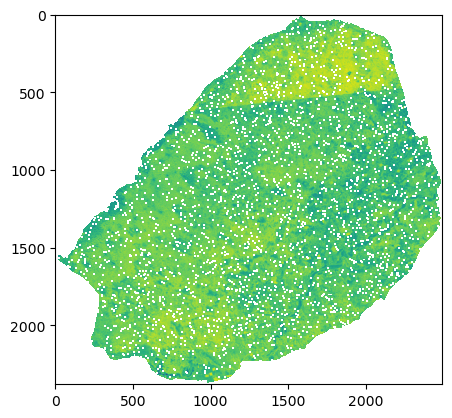

In [57]:
# plt.imshow(array_stack[3])

## Prediction

In [92]:
# Make predition 
data = data.reshape(data.shape[0], -1)
# data.shape
# data = ss.fit_transform(data)
map_x = np.transpose(data[0:,...])
# map_x.shape
# map_x = np.nan_to_num(map_x)
pred_map = best_estimator_gs.predict(map_x)
pred_map = pred_map.reshape(h, w)

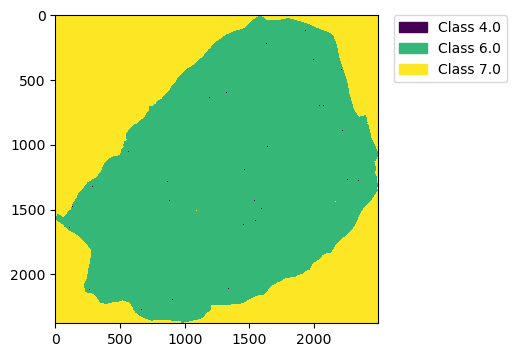

In [93]:
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

values = np.unique(pred_map.ravel())

plt.figure(figsize=(8,4))
im = plt.imshow(pred_map, interpolation='none')

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="Class {l}".format(l=values[i]) ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.show()